In [33]:
import pandas as pd
import geopandas as gpd

In [34]:
#Importing a new dataframe that gauges various health conditions and has a socio vulnerability index, changing the Census Tract, California County and approximate location to string values 
df = pd.read_csv('Calenviroscreen4.csv',
    dtype=
    {
        'Census Tract':str,
        'California County':str,
        'Approximate Location': str
    }
)
df.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95


In [35]:
df['Census Tract'] = df['Census Tract'].str.zfill(11)

In [36]:
# look at the data types, verbose = True shows all the counts
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   object 
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8   CES 4.0 Percentile           7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

In [48]:
# Choosing all column with data I want to keep, added the "Hazard Waste" and "Ozone" variable to see if they have an impact or not 
columns_to_keep = ['Census Tract',
                   'Total Population',
                   'California County',
                   'Approximate Location',
                   'CES 4.0 Score',
                   'CES 4.0 Percentile Range',
                   'Pollution Burden Score',
                   'Pop. Char. Pctl',
                   'PM2.5 Pctl',
                   'Lead Pctl',
                   'Tox. Release Pctl',
                   'Cleanup Sites Pctl',
                   'Asthma Pctl',
                   'Cardiovascular Disease Pctl',
                   'Low Birth Weight Pctl',
                  'Haz. Waste Pctl','Ozone Pctl']

df2 = df[columns_to_keep]
df2.info

<bound method DataFrame.info of      Census Tract  Total Population California County  \
0     06019001100              2780           Fresno    
1     06077000700              4680       San Joaquin   
2     06037204920              2751       Los Angeles   
3     06019000700              3664           Fresno    
4     06019000200              2689           Fresno    
...           ...               ...               ...   
8030  06107004000               582           Tulare    
8031  06109985202              2509         Tuolumne    
8032  06111001206               778          Ventura    
8033  06111003012               675          Ventura    
8034  06111980000               118          Ventura    

                     Approximate Location  CES 4.0 Score  \
0                                  Fresno          93.18   
1                                Stockton          86.65   
2                             Los Angeles          82.39   
3                                  Fresno  

In [49]:
#Narrowed perview down to LA County 
df2LA = df2[df2['California County'] == 'Los Angeles']

In [50]:
# Verified the info
df2LA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2343 entries, 2 to 7990
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 2343 non-null   object 
 1   Total Population             2343 non-null   int64  
 2   California County            2343 non-null   object 
 3   Approximate Location         2343 non-null   object 
 4   CES 4.0 Score                2297 non-null   float64
 5   CES 4.0 Percentile Range     2297 non-null   object 
 6   Pollution Burden Score       2343 non-null   float64
 7   Pop. Char. Pctl              2297 non-null   float64
 8   PM2.5 Pctl                   2343 non-null   float64
 9   Lead Pctl                    2299 non-null   float64
 10  Tox. Release Pctl            2343 non-null   float64
 11  Cleanup Sites Pctl           2343 non-null   float64
 12  Asthma Pctl                  2334 non-null   float64
 13  Cardiovascular Disease 

In [51]:
# read the census info to see what info is important
tracts = gpd.read_file('2020_Census_Tracts.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


In [52]:
# join the data to CalEnviroscreen data to the Census Tract 
tracts['Census Tract'] ='06' + '037' + tracts['CT20']

In [53]:
# merge the two datasets and saved to a loop 
CEStracts=tracts.merge(df2,on="Census Tract")


In [98]:
#read and looped in the Oil Weel  data, included all wells not jsut active oil wells 
df = pd.read_csv('Oil_Wells.csv')

In [104]:
Converted to Merecator Projeector 
gdf_oil = gpd.GeoDataFrame(dfoil, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(dfoil.Longitude, dfoil.Latitude))

In [57]:
# spatial join from coordinates
gdfoilCES = gpd.sjoin(gdf_oil, CEStracts, how='right', op='within')
gdfoilCES.head()

/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,index_left,X,Y,OBJECTID_left,DistrictNu,APINumber,BLMWell,DryHole,WellStatus,OperatorNa,...,Pop. Char. Pctl,PM2.5 Pctl,Lead Pctl,Tox. Release Pctl,Cleanup Sites Pctl,Asthma Pctl,Cardiovascular Disease Pctl,Low Birth Weight Pctl,Haz. Waste Pctl,Ozone Pctl
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.69,57.90,66.57,59.51,0.0,26.53,75.46,13.91,20.32,93.63
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.44,55.61,34.42,59.19,0.0,19.65,55.53,32.47,43.30,95.27
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.48,57.51,77.32,60.07,0.0,26.53,75.46,36.14,16.64,93.63
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.61,55.00,52.54,61.00,0.0,13.06,45.13,17.68,16.64,91.05
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.11,56.14,60.34,61.39,0.0,15.28,38.66,60.06,21.96,91.05


In [58]:
gdfBH = gdfoilCES[gdfoilCES['Approximate Location'] == 'Beverly Hills']

In [59]:
gdfBH.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 39 entries, 1805 to 1811
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   index_left                   34 non-null     float64 
 1   X                            34 non-null     float64 
 2   Y                            34 non-null     float64 
 3   OBJECTID_left                34 non-null     float64 
 4   DistrictNu                   34 non-null     object  
 5   APINumber                    34 non-null     float64 
 6   BLMWell                      34 non-null     object  
 7   DryHole                      34 non-null     object  
 8   WellStatus                   34 non-null     object  
 9   OperatorNa                   34 non-null     object  
 10  CountyName                   34 non-null     object  
 11  FieldName                    34 non-null     object  
 12  AreaName                     34 non-null     object  
 13 

In [60]:
#imported library package
import plotly.express as px

In [61]:
import matplotlib.pyplot as plt
import contextily as ctx

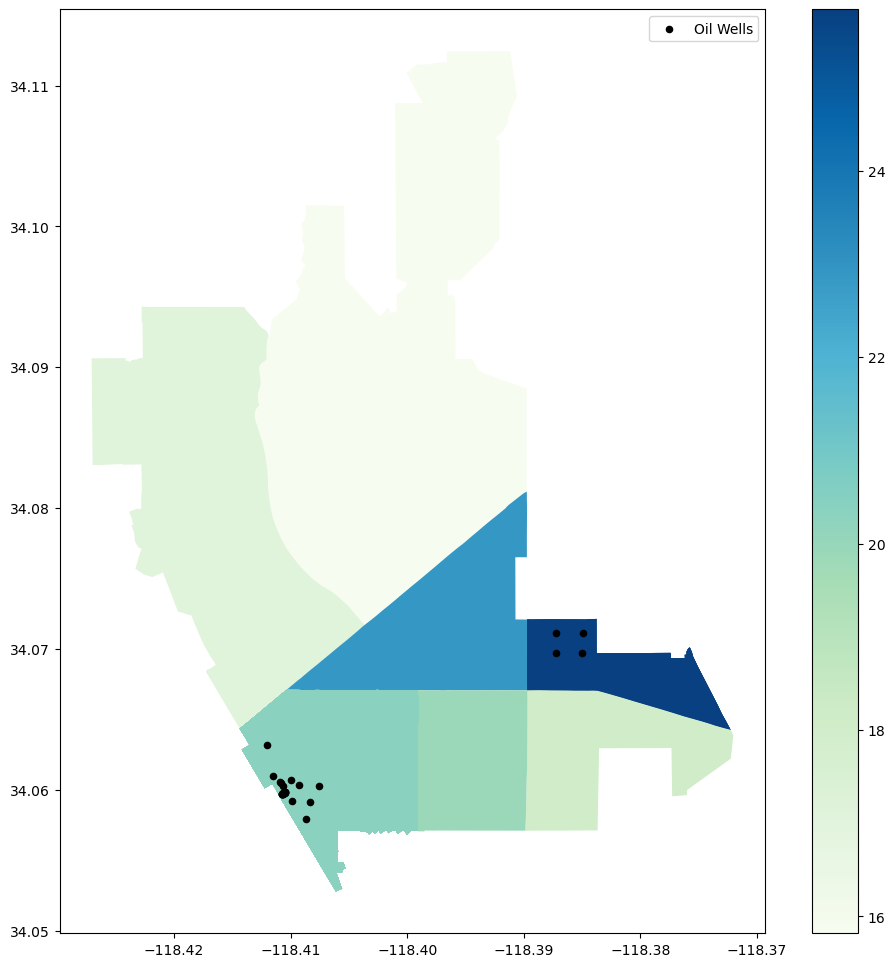

In [74]:
#Mapped the social vunernability indexed in the dataframe with oil wells mapped in 
fig,ax = plt.subplots(figsize=(12,12))

# plot variable
gdfBH.plot(ax=ax,column='CES 4.0 Score',legend=True,cmap='GnBu')

# plot oil wells
ax.scatter(gdfBH['Longitude'], gdfBH['Latitude'], color='black', marker='o', label='Oil Wells', s=20)

plt.legend()
plt.show()

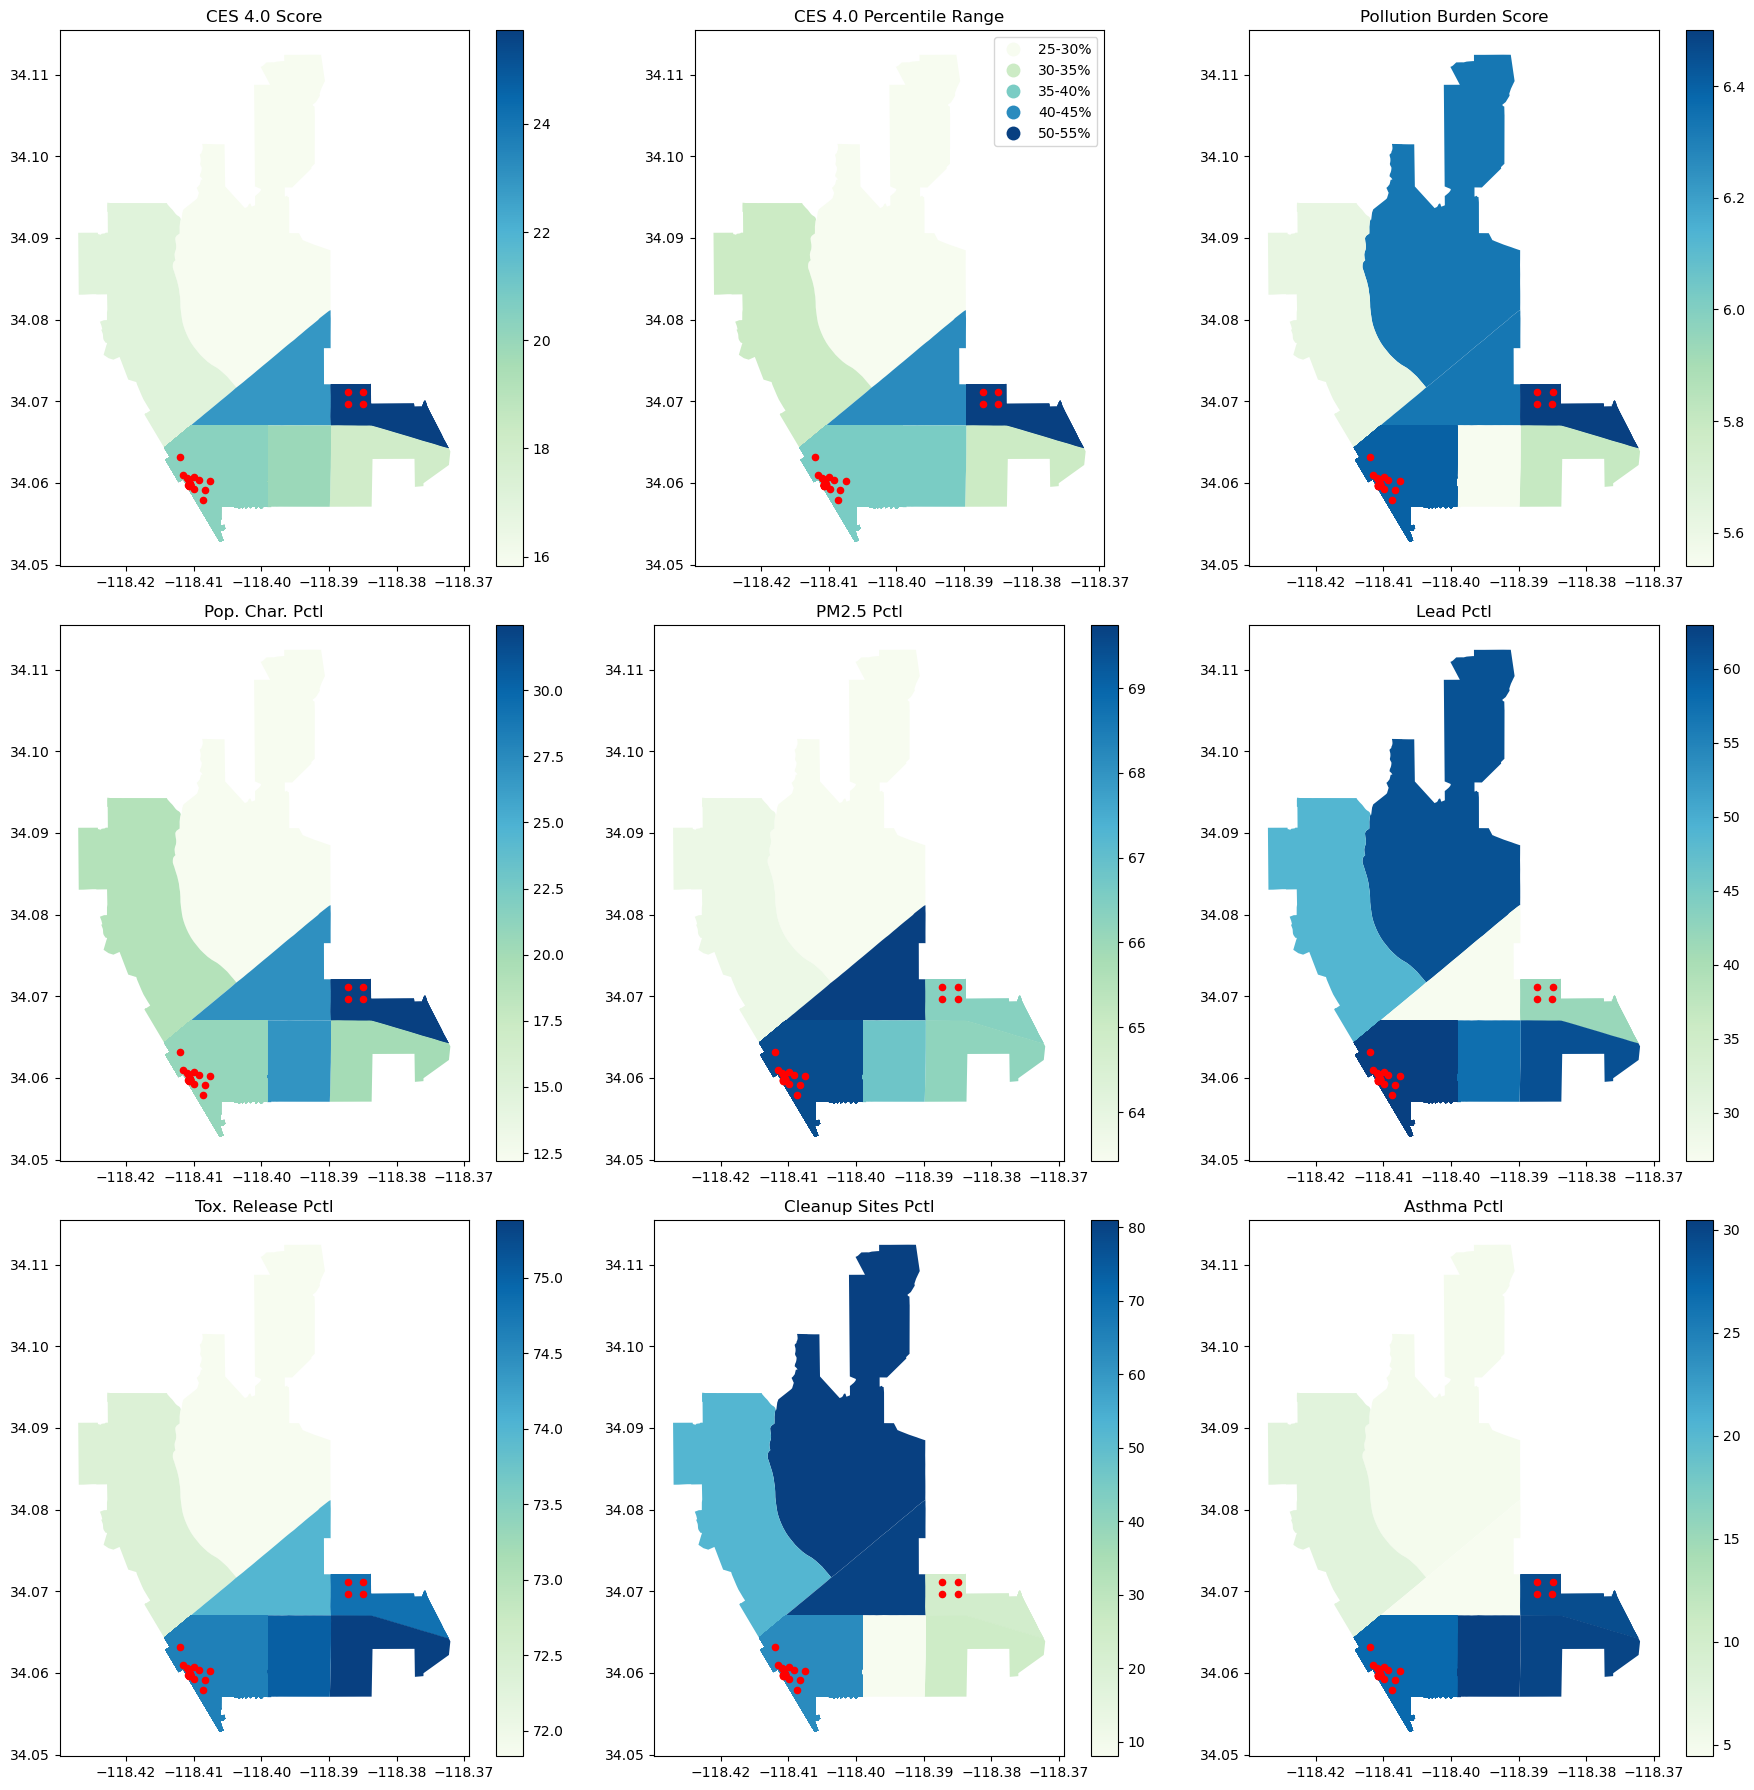

In [77]:
#mapped the rest of the dataset we wabted to see 
def plot_CES_map(gdf, factor, ax, overlay_points=None):
    # Plot CES data
    gdf.plot(ax=ax, column=factor, legend=True, cmap='GnBu')
    ax.set_title(factor)
    
    # show oil wells as an overlay
    if overlay_points is not None:
        # Plot overlay points
        ax.scatter(overlay_points['Longitude'], overlay_points['Latitude'], color='red', marker='o', label='Oil Wells', s=20)

def calenvirofactor():
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
    axs = axs.flatten()

    # List of factors
    factors = ['CES 4.0 Score',
                   'CES 4.0 Percentile Range',
                   'Pollution Burden Score',
                   'Pop. Char. Pctl',
                   'PM2.5 Pctl',
                   'Lead Pctl',
                   'Tox. Release Pctl',
                   'Cleanup Sites Pctl',
                   'Asthma Pctl',
                   'Cardiovascular Disease Pctl',
                   'Low Birth Weight Pctl',
                  'Haz. Waste Pctl','Ozone Pctl']

    for factor, ax in zip(factors, axs):
        plot_CES_map(gdfBH, factor, ax, overlay_points=gdfBH)

    plt.tight_layout()
    plt.show()

calenvirofactor()

In [78]:
# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

# for interactive webmaps
import folium